# COGS 108 - Final Project Proposal

# Names

- Jason Krentsel (github: JasonKrentsel)
- Gerardo Cortez (github: gerardocorparr)
- Chunjiang Liu (github: chl091)
- Veeraj Vishnu Sankar (github: vvishnus)


# Research Question

What is the relationship between **religiosity, income, education,** and **access to birth control** with **state-level abortion rates** in the United States? How do these factors contribute to the variations observed in **state-level abortion rates** across different states?


# Background and Prior Work


Religion has been studied as a potential factor affecting abortion rates. Studies show that states with higher religious affiliation, especially those with more conservative religious beliefs, tend to have lower abortion rates. The influence of religious beliefs on abortion decisions is often related to moral values ​​and teachings in religious communities that prohibit or condemn abortion.  

Income has also been identified as a factor affecting abortion rates. Research suggests that low-income people may face financial constraints that make raising a child more difficult, leading to a greater likelihood of seeking an abortion. Conversely, people with higher incomes may have better access to resources and support, which could reduce the demand for abortion.  

Education is correlated with a decrease in abortion rates. A higher level of education leads to a deeper knowledge of birth control methods and reproductive health. This increased understanding and awareness often leads to more effective use of contraception, reducing the risk of unwanted pregnancies.  

Access to contraceptive methods and family planning services are also important factors affecting abortion rates. Countries with comprehensive sexuality education programs, easy access to affordable contraceptives, and supportive reproductive health policies tend to have lower abortion rates. Access to contraceptives empowers people to make reproductive health decisions and reduces the incidence of unwanted pregnancies.[^Bloomer2017]  

As for our methodology, we intend to use multiple datasets to test our hypothesis. This method of **data triangulation** helps us draw inferences from a multitude of likely factors that may affect abortion which may not have been taken into account in the individual datasets. This method helps cast a wider net to pinpoint which factors affect abortion indicators the most.  

Group 12 from winter of 2020 uses a similar data triangulation methodology to explore the potential factors that may have an effect on any particular state in its support or opposition of the death penalty. They utilize statewide data for religiosity, education, politics etc from different datasets to test their hypothesis. [^Wi20 Grp12]  

[^Bloomer2017]Fiona K. Bloomer, Kellie O’Dowd & Catriona Macleod (2017) Breaking the silence on abortion: the role of adult community abortion education in fostering resistance to norms, Culture, Health & Sexuality, 19:7, 709-722, DOI: 10.1080/13691058.2016.1257740
[^Wi20 Grp12] https://github.com/COGS108/FinalProjects-Wi20/blob/master/FinalProject_group012.ipynb



# Hypothesis


We believe there is a significant relationship between income levels and abortion rates, such that states with lower income levels will have higher abortion rates compared to states with higher income levels, even when other factors are held constant.  


We must also consider the null hypothesis case that when other significant variables are held constant, income is not that significantly correlated with abortion rate. As in, income might correlate with abortion rate when looking at all states, but might not be that accurate when looking only at the heavily religious states.


# Data

The ideal dataset for this question would have an observation for each state, and the variables included would be contained in one of 3 groups: Abortion rate by state, Some income or wealth metric by state, and additional demographic variables. Though having one source for all this data would be nice, likely we would collect separate datasets on state statistics and combine them. We would of course try to find the most legitimate sources for our data, though that might be more challenging for more vague factors like birth control availability. We will organize our data in a CSV table with each row containing a state and their respective statistics.  

The following are real datasets that we will likely utilize in answering our question. Of course we have data for abortion rate and median income as a wealth metric, but we also have religiousness, education, and birth control access as demographic variables. Combining this data into one document can allow us to make deeper inferences not only about the relation between abortion rate and income, but also between other significant factors.  

Dataset #1: Abortion rate by state  
Link: https://www.kff.org/womens-health-policy/state-indicator/abortion-rate/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D  

Dataset #2: religiousness by state (% of population with certain belief in god)  
Link: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity  

Dataset #3: education by state  
Link: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_educational_attainment  

Dataset #4: Median Income by state  
Link: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income  

Dataset #5: Birth Control access by state  
Link: https://www.yourlawyer.com/library/best-and-worst-birth-control-access-across-america/  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Since we are working with 5 different datasets with the intention of combining them, we have to utilize a unique solution for each source. Our goal is to get a 50x2 dataframe for each source with each U.S. state and their respective data.

In [2]:
states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma",
    "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Dataset 1

We begin with Dataset #1: Abortion rate by state, which thankfully provides a csv file, which we downloaded and named "abortion rate.csv". This CSV had some extra information in certain cells explaining the data. I reorginized the CSV file so that it is just a simple table.

In [3]:
rateData = pd.read_csv('abortion rate.csv', names=['Location', 'Abortion Rate'])

In [4]:
# check out how our data looks like
print(rateData.shape)
rateData

(53, 2)


,Location,Abortion Rate
Location,Abortion Rate,Footnotes
United States,NaN,NaN
Alabama,6,NaN
Alaska,8.4,NaN
Arizona,9.3,NaN
Arkansas,5.4,NaN
California,NR,NaN
Colorado,8.3,NaN
Connecticut,13.6,NaN
Delaware,12.5,NaN


So it looks like we have a couple missing values, along with a couple extra entries we don't want. Lets deal with that.

In [5]:
# We can use this to access rate by state name
# Utilizing our states list we can grab every observation we need
rateData = rateData['Location'][states]

# Change all non-recorded values to 0
# This is not a realistic value, so it still serves as a good marker
rateData[rateData == 'NR'] = '0'

# Change the data from strings to numeric values and sort
rateData = pd.to_numeric(rateData)
rateData = rateData.sort_values()

print(rateData.shape)
print(rateData)


(50,)
New Hampshire      0.0
Maryland           0.0
California         0.0
Missouri           0.1
South Dakota       0.8
Wyoming            0.8
West Virginia      3.2
Utah               3.3
Idaho              4.8
Kentucky           4.8
Oklahoma           4.9
Arkansas           5.4
South Carolina     5.5
Wisconsin          5.9
Indiana            5.9
Alabama            6.0
Mississippi        6.1
Nebraska           6.3
Iowa               6.8
Hawaii             7.0
North Dakota       7.9
Louisiana          8.1
Colorado           8.3
Oregon             8.4
Tennessee          8.4
Alaska             8.4
Montana            8.4
Maine              8.8
Texas              9.0
Virginia           9.2
Ohio               9.3
Arizona            9.3
Minnesota          9.5
New Mexico        10.7
Vermont           10.7
Washington        11.0
Massachusetts     11.8
Delaware          12.5
Rhode Island      12.6
Kansas            13.4
Pennsylvania      13.5
Connecticut       13.6
New Jersey        13.7
Nevad

Text(0.5, 1.0, 'Reported Abortion Rate by U.S. State')

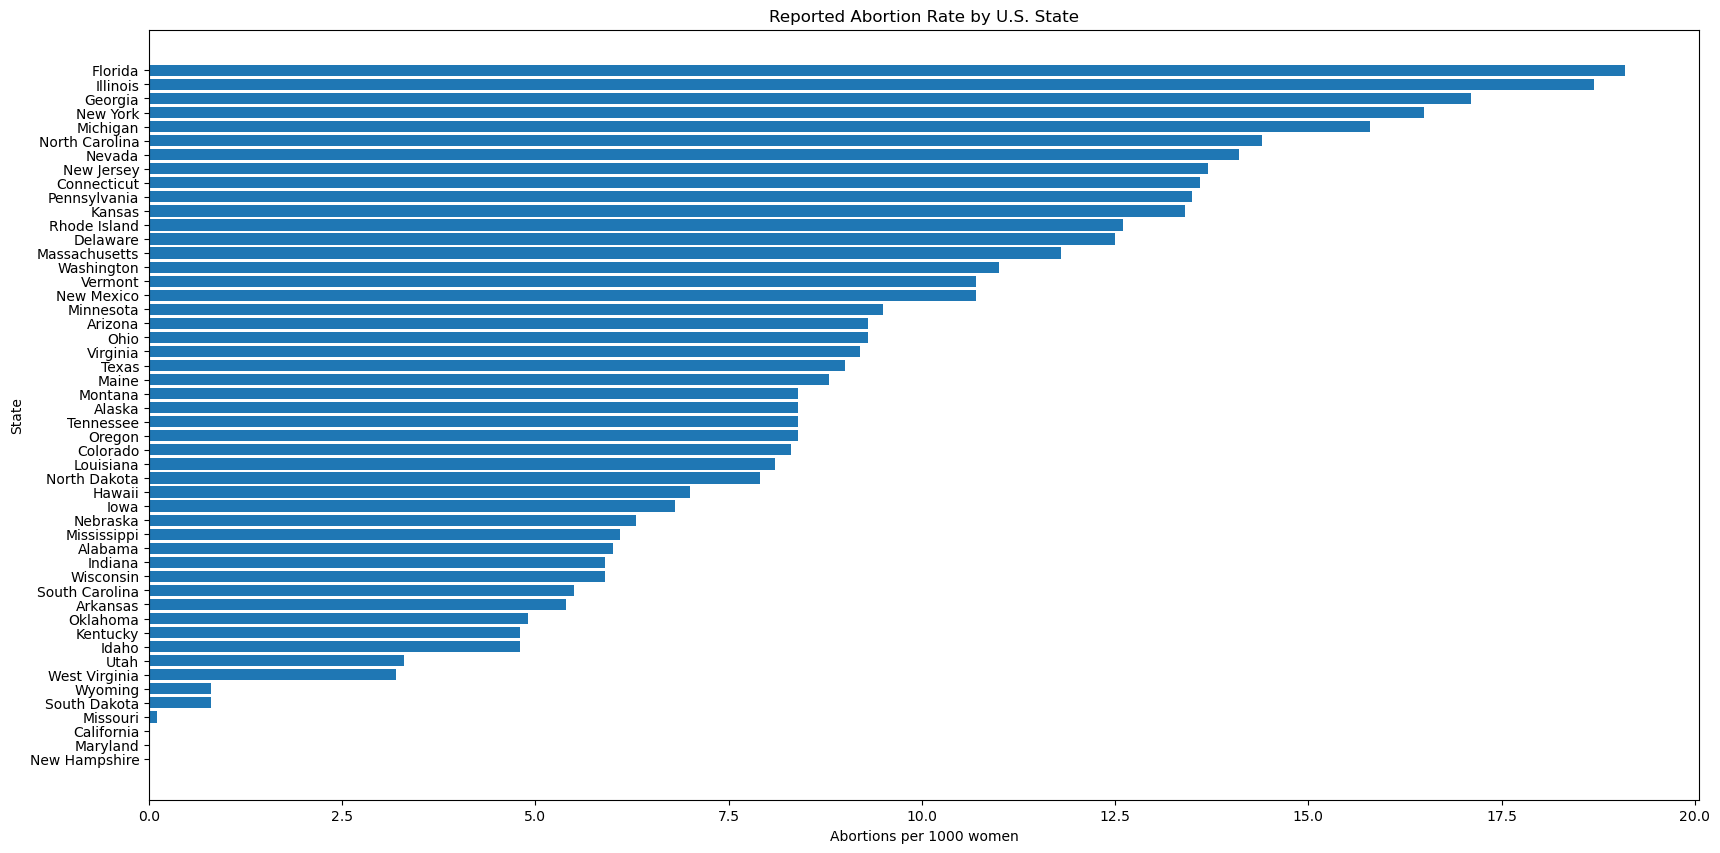

In [6]:
fig = plt.figure(figsize=(20,10))

plt.barh(rateData.index, rateData.values)

plt.xlabel('Abortions per 1000 women')
plt.ylabel('State')
plt.title('Reported Abortion Rate by U.S. State')

So there we go, now we have our abortion rate data stored in the "rateData" variable

# Dataset 2

This dataset is found on wikipedia, which is luckily very structured and we can utilize some of pandas' methods to make it very easy to get the table we want.

In [7]:
# This gives us a list of tables taken from this wikipedia page
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity")

In [8]:
# There are only a handfull of tables, so we go through and found our desired one to be the 5th index
religionTable = tables[5]

# Set the indices to be by state
religiousData = religionTable.set_index('State or District')['Believe in God with Certainty']

# Retrieve only state data
religiousData = religiousData[states]

# Check shape and data
print(religiousData.shape)
print(religiousData)

(50,)
State or District
Alabama           82%
Alaska            55%
Arizona           62%
Arkansas          77%
California        54%
Colorado          55%
Connecticut       54%
Delaware          61%
Florida           64%
Georgia           74%
Hawaii            62%
Idaho             62%
Illinois          61%
Indiana           63%
Iowa              66%
Kansas            66%
Kentucky          75%
Louisiana         75%
Maine             48%
Maryland          64%
Massachusetts     40%
Michigan          63%
Minnesota         56%
Mississippi       82%
Missouri          70%
Montana           64%
Nebraska          66%
Nevada            59%
New Hampshire     43%
New Jersey        60%
New Mexico        63%
New York          56%
North Carolina    73%
North Dakota      64%
Ohio              67%
Oklahoma          71%
Oregon            57%
Pennsylvania      61%
Rhode Island      60%
South Carolina    74%
South Dakota      69%
Tennessee         78%
Texas             69%
Utah              61%
Vermont 

In [9]:
# Remove the %s for parsing
religiousData = religiousData.str.replace('%', '')

In [10]:
# Parse percentages into numeric values
religiousData = pd.to_numeric(religiousData)

In [11]:
# Divide by 100 to convert values into porportions
religiousData = religiousData / 100

In [12]:
# Sort and preview our data
religiousData = religiousData.sort_values()
religiousData

State or District
Massachusetts     0.40
Vermont           0.41
New Hampshire     0.43
Maine             0.48
California        0.54
Connecticut       0.54
Colorado          0.55
Alaska            0.55
Washington        0.55
New York          0.56
Wisconsin         0.56
Minnesota         0.56
Oregon            0.57
Nevada            0.59
Rhode Island      0.60
New Jersey        0.60
Utah              0.61
Pennsylvania      0.61
Illinois          0.61
Delaware          0.61
Hawaii            0.62
Arizona           0.62
Idaho             0.62
Indiana           0.63
Michigan          0.63
New Mexico        0.63
Maryland          0.64
Montana           0.64
North Dakota      0.64
Florida           0.64
Iowa              0.66
Kansas            0.66
Nebraska          0.66
Wyoming           0.66
Ohio              0.67
Virginia          0.67
South Dakota      0.69
Texas             0.69
Missouri          0.70
Oklahoma          0.71
North Carolina    0.73
South Carolina    0.74
Georgia         

Text(0.5, 1.0, 'Reported Porportion of People with Certain Belief in God by State')

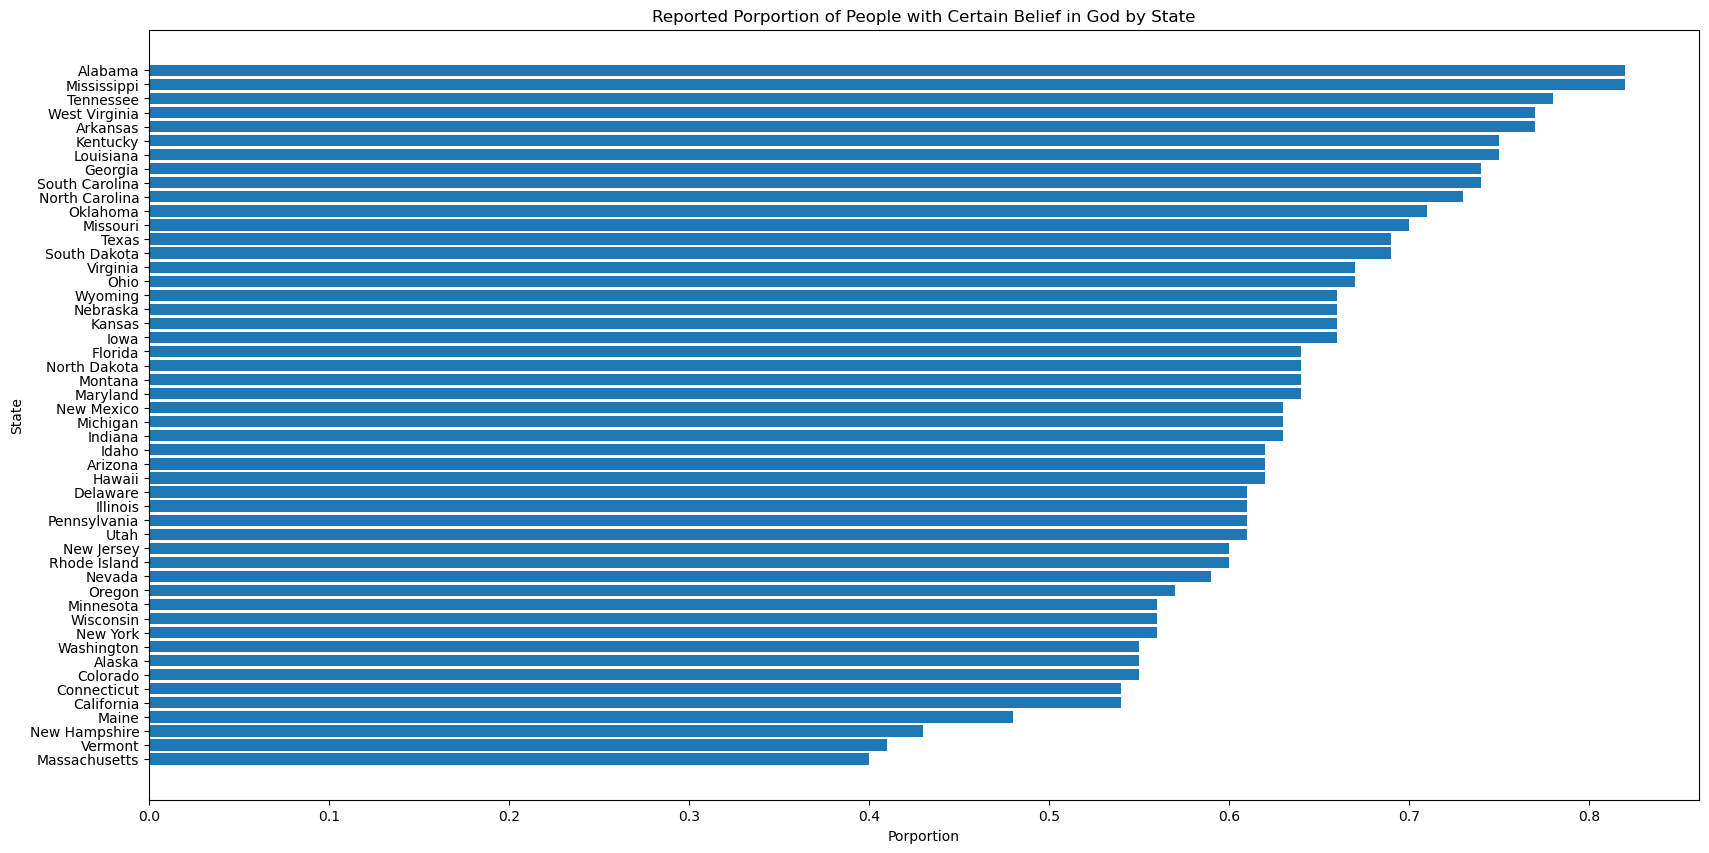

In [13]:
fig = plt.figure(figsize=(20,10))

plt.barh(religiousData.index, religiousData.values)

plt.xlabel('Porportion')
plt.ylabel('State')
plt.title('Reported Porportion of People with Certain Belief in God by State')

So there we go, now we have our religiousness data stored in the "religiousData" variable

# Dataset 3 - Educational Attainments

In [14]:
url3 = 'https://raw.githubusercontent.com/vvishnus/COGS108_Repo/main/educational_attainments.csv'
education_attainment= pd.read_csv(url3)
#Rows needed = 15(Bachelor's degree or higher for people aged 25 and over), columns needed - Alabama!!Percent!!Estimate

In [15]:
edu_columns = education_attainment.columns.tolist()
substring = '!!Percent!!Estimate'

columns_needed = [col for col in edu_columns if substring in col]

# Only keeping the columns that specify total percent of estimate of attainment of bachelors degree or higher
education_attainment = education_attainment[columns_needed]

# Row 15 has the data we need, so we only keep row number 15
education_attainment = education_attainment.iloc[15]

In [16]:
# Remove '!!Percent!!Estimate' from each string
states_needed = [s.replace('!!Percent!!Estimate', '') for s in columns_needed]

missing = [state for state in states_needed if state not in states]
missing


['District of Columbia', 'Puerto Rico']

In [17]:
# Assign the new index labels to the pandas Series
education_attainment.index = states_needed
education_attainment = education_attainment.drop(missing)

In [18]:
education_attainment = education_attainment.str.replace('%', '')
education_attainment = education_attainment.astype(float)
education_attainment = education_attainment.sort_values()

Text(0.5, 1.0, 'total percent of estimate of attainment of bachelors degree or higher')

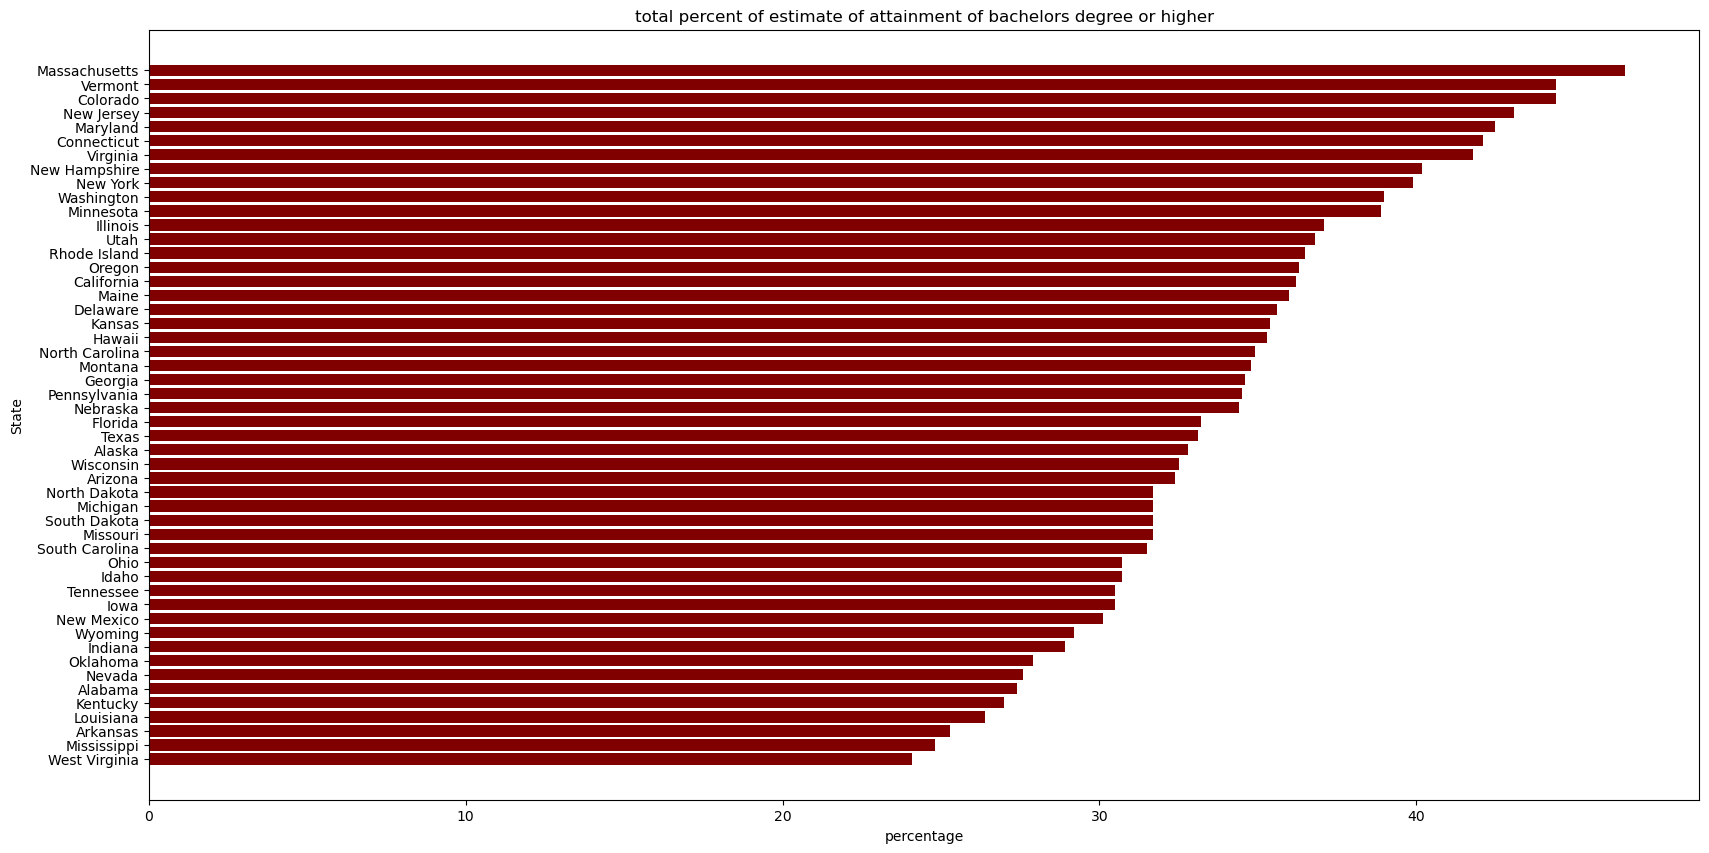

In [19]:
fig3 = plt.figure(figsize=(20,10))

plt.barh(education_attainment.index, education_attainment.values, color='maroon')

plt.xlabel('percentage')
plt.ylabel('State')
plt.title('total percent of estimate of attainment of bachelors degree or higher')

# Dataset 4

Entering the data from gov sources, and editing the names of the columns. Data scraping failed for some reason

In [20]:
data1 = {
    "State Rank": [
        "1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
        "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22",
        "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34",
        "35", "36", "37", "38", "39", "40", "41", "42", "43", "44", "45", "46",
        "47", "48", "49", "50"
    ],
    "States and Washington, D.C.": [
        "Maryland", "Massachusetts",
        "New Jersey", "New Hampshire", "California", "Hawaii",
        "Washington", "Connecticut", "Colorado", "Virginia",
        "Utah", "Alaska", "Minnesota", "New York",
        "Rhode Island", "Vermont", "Illinois", "Oregon", "Delaware", "Arizona",
        "Pennsylvania", "Wisconsin", "Texas", "Nebraska",
        "Georgia", "North Dakota", "Idaho", "Nevada",
        "South Dakota", "Iowa", "Wyoming", "Maine", "Kansas", "Michigan",
        "Montana", "Florida", "Indiana", "Ohio", "North Carolina", "Missouri",
        "Tennessee", "South Carolina", "Oklahoma", "Kentucky", "New Mexico",
        "Alabama", "Arkansas", "Louisiana", "West Virginia", "Mississippi"
    ],
    "2021": [
        "$90,203", "$89,645", "$89,296", "$88,465", "$84,907",
        "$84,857", "$84,247", "$83,771", "$82,254", "$80,963", "$79,449", "$77,845",
        "$77,720", "$74,314", "$74,008", "$72,431", "$72,205", "$71,562", "$71,091",
        "$69,056", "$68,957", "$67,125", "$66,963", "$66,817", "$66,559", "$66,519",
        "$66,474", "$66,274", "$66,143", "$65,600", "$65,204", "$64,767", "$64,124",
        "$63,498", "$63,249", "$63,062", "$62,743", "$62,262", "$61,972", "$61,847",
        "$59,695", "$59,318", "$55,826", "$55,573", "$53,992", "$53,913", "$52,528",
        "$52,087", "$51,248", "$48,716"
    ],
    "2019": [
        "$86,738", "$85,843", "$85,751", "$77,933", "$80,440",
        "$83,102", "$78,687", "$78,833", "$77,127", "$76,456", "$75,780", "$75,463",
        "$74,593", "$72,108", "$71,169", "$63,001", "$69,187", "$67,058", "$70,176",
        "$62,055", "$63,463", "$64,168", "$64,034", "$63,229", "$61,980", "$64,577",
        "$60,999", "$63,276", "$59,533", "$61,691", "$65,003", "$58,924", "$62,087",
        "$59,584", "$57,153", "$59,227", "$57,603", "$58,642", "$57,341", "$57,409",
        "$56,071", "$56,227", "$54,449", "$52,295", "$51,945", "$51,734", "$48,952",
        "$51,073", "$48,850", "$45,792"
    ]}

state_incomes = pd.DataFrame(data1)
state_incomes = state_incomes.rename(columns={"States and Washington, D.C.": "States"})



Making sure there are no missing states

In [21]:
missing_states = [state for state in states if state not in state_incomes['States'].unique()]

if missing_states:
    print("These states are missing from the 'States and Washington, D.C.' column:", missing_states)
else:
    print("All states are present in the 'States' column.")


All states are present in the 'States' column.


In [22]:
state_incomes

,State Rank,States,2021,2019
0,1,Maryland,"$90,203","$86,738"
1,2,Massachusetts,"$89,645","$85,843"
2,3,New Jersey,"$89,296","$85,751"
3,4,New Hampshire,"$88,465","$77,933"
4,5,California,"$84,907","$80,440"
5,6,Hawaii,"$84,857","$83,102"
6,7,Washington,"$84,247","$78,687"
7,8,Connecticut,"$83,771","$78,833"
8,9,Colorado,"$82,254","$77,127"
9,10,Virginia,"$80,963","$76,456"


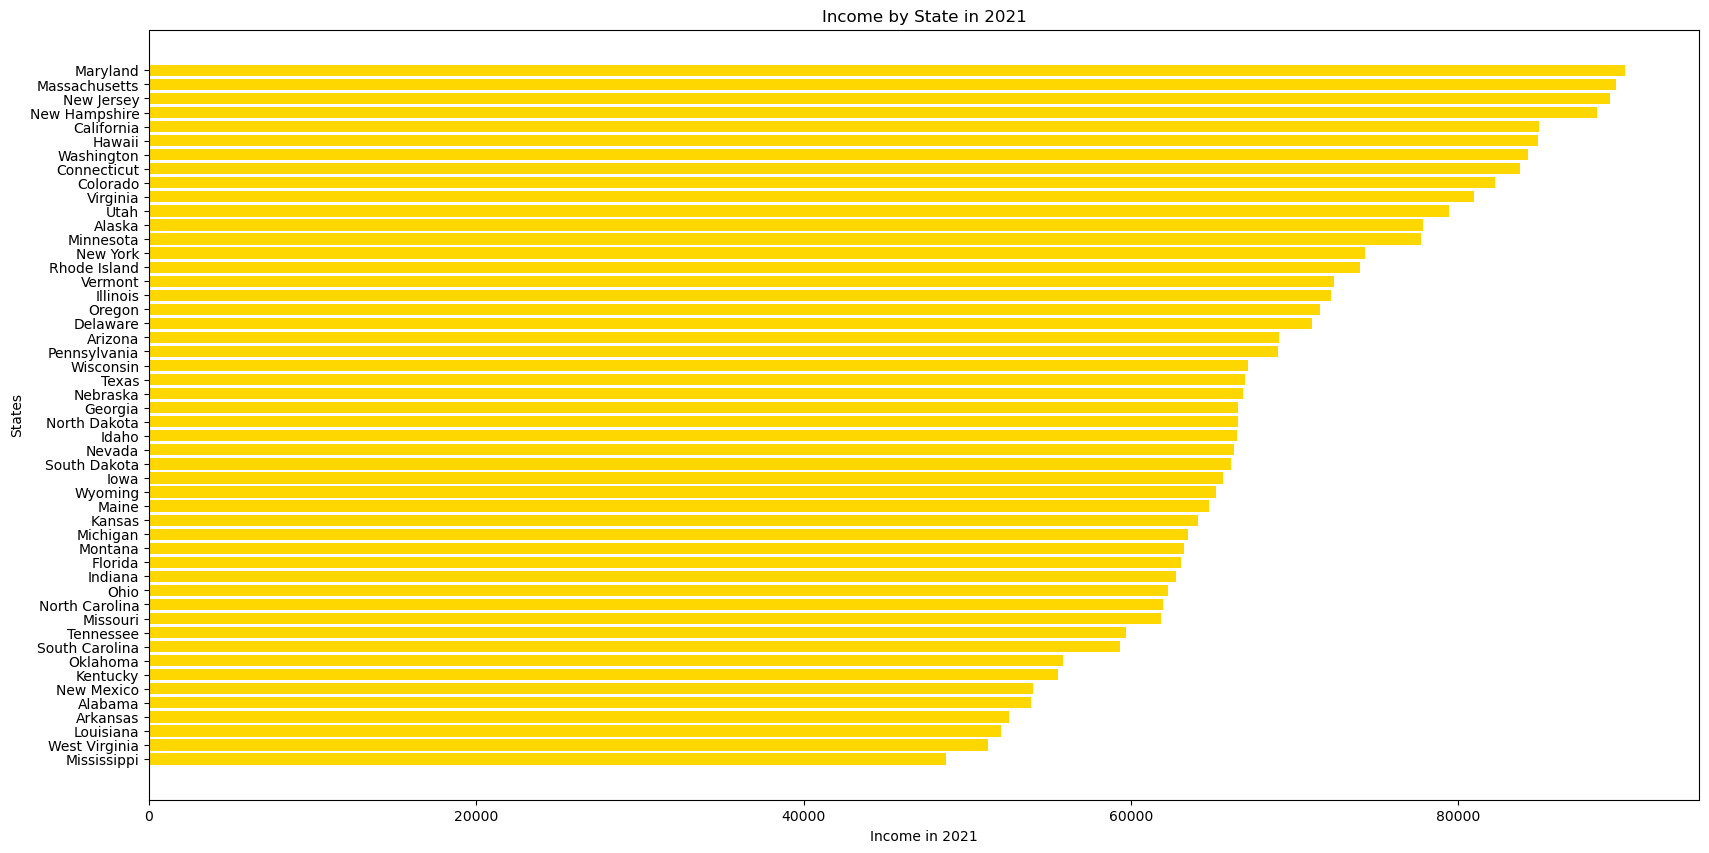

In [23]:
# Convert '2021' column to float
state_incomes['2021'] = state_incomes['2021'].replace('[\$,]', '', regex=True).astype(float)
plt.figure(figsize=(20,10))

# Create bar graph
plt.barh(state_incomes['States'], state_incomes['2021'], color='gold')

# Invert y-axis to have highest values on top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Income in 2021')
plt.ylabel('States')
plt.title('Income by State in 2021')

# Show the plot
plt.show()


In [34]:
incomeDataSeries = state_incomes.set_index('States')['2021']
print(len(incomeDataSeries))
print(incomeDataSeries)

50
States
Maryland          90203.0
Massachusetts     89645.0
New Jersey        89296.0
New Hampshire     88465.0
California        84907.0
Hawaii            84857.0
Washington        84247.0
Connecticut       83771.0
Colorado          82254.0
Virginia          80963.0
Utah              79449.0
Alaska            77845.0
Minnesota         77720.0
New York          74314.0
Rhode Island      74008.0
Vermont           72431.0
Illinois          72205.0
Oregon            71562.0
Delaware          71091.0
Arizona           69056.0
Pennsylvania      68957.0
Wisconsin         67125.0
Texas             66963.0
Nebraska          66817.0
Georgia           66559.0
North Dakota      66519.0
Idaho             66474.0
Nevada            66274.0
South Dakota      66143.0
Iowa              65600.0
Wyoming           65204.0
Maine             64767.0
Kansas            64124.0
Michigan          63498.0
Montana           63249.0
Florida           63062.0
Indiana           62743.0
Ohio              62262.0
No

# Dataset 5

This data was retreive from a government source

In [24]:
bcdata = { 'State Rank':  ['1', '2', '3', '4', '5', '6', '7','8', '9', '10',
        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
        '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
        '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
        '47', '48', '49', '50'],
          
'State' : ['Illinois', 'Vermont',  'Maine', 'West Virginia' ,'New Hampshire' ,'Maryland' ,'Virginia' ,'New Jersey' ,'Alaska' ,'Connecticut' ,'Minnesota' ,'Massachusetts' ,'Hawaii', 'Wisconsin' ,'Colorado' ,'Wyoming' ,'Iowa' ,'New York' ,'Arkansas' ,'Rhode Island' ,'Nebraska' ,'Delaware' ,'Pennsylvania' ,'North Dakota','Georgia' ,'Oklahoma' ,'Washington' ,'Kentucky' ,'Montana' ,'Kansas' ,'Missouri' ,'Tennessee' ,'Ohio' ,'Nevada' , 'Michigan' ,'Texas' ,'North Carolina' ,'Mississippi' ,'Idaho' ,'California' ,'South Dakota' ,'Indiana' ,'South Carolina' ,'Florida', 'Utah', 'Louisiana', 'Alabama', 'New Mexico', 'Oregon', 'Arizona'],
          
'Percentage of Women Who Live in a Contraceptive Desert' : [
'15.39', '17.73', '20.43', '21.69', '22.55', '22.85', '23.24', '23.46', '23.57', '24.36', '25.43', '25.54', '25.6', '27.48', '27.66', '27.92', '28.13', '28.17', '28.20', '28.24', '28.72', '28.85', '28.94', '28.97', '29.07', '29.3', '29.35', '29.48', '29.75', '29.83', '29.88', '29.93', '30.25', '30.41', '30.66', '30.72', '30.83', '30.85', '31.04', '31.13', '31.35', '31.4', '31.47', '31.55', '31.57', '31.63', '31.64', '31.65', '32.93', '33.60']}

contra_avail = pd.DataFrame(bcdata)

In [25]:
state_col = bcdata['State']
missing_states = [state for state in states if state not in state_col]

# Check if there are any missing states
if missing_states:
    print("Missing states:", missing_states)
else:
    print("You Good")

You Good


In [26]:
contra_avail

,State Rank,State,Percentage of Women Who Live in a Contraceptive Desert
0,1,Illinois,15.39
1,2,Vermont,17.73
2,3,Maine,20.43
3,4,West Virginia,21.69
4,5,New Hampshire,22.55
5,6,Maryland,22.85
6,7,Virginia,23.24
7,8,New Jersey,23.46
8,9,Alaska,23.57
9,10,Connecticut,24.36


Text(0.5, 1.0, 'Total % of Contracpetive Desert per State')

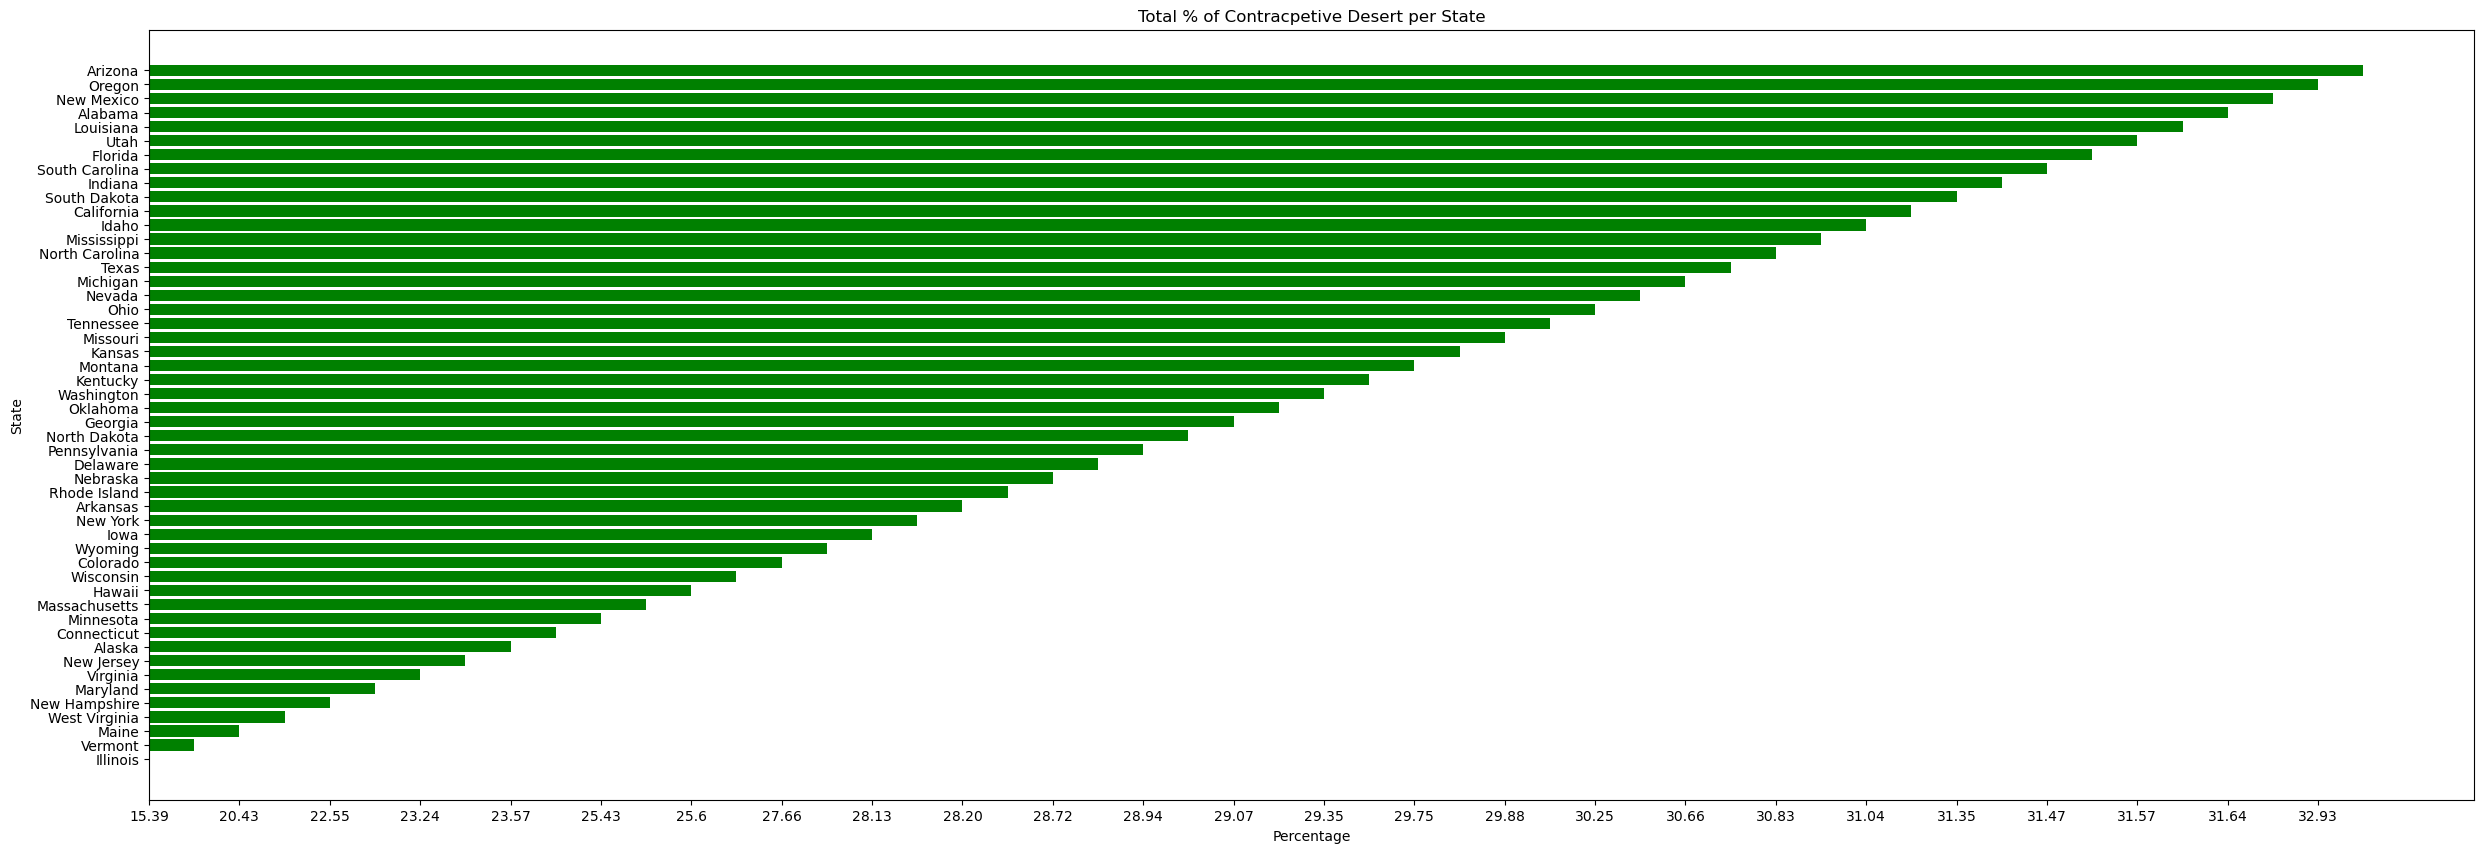

In [27]:
#Make Plot
plt.figure(figsize=(30,10))
plt.barh(bcdata['State'], bcdata['Percentage of Women Who Live in a Contraceptive Desert'], color='green')
ticks = range(0,50,2)
plt.xticks(ticks)
#label Plot
plt.xlabel('Percentage')
plt.ylabel('State')
plt.title('Total % of Contracpetive Desert per State')

In [40]:
contraDesertSeries = contra_avail.set_index('State')['Percentage of Women Who Live in a Contraceptive Desert']
print(len(contraDesertSeries))
print(contraDesertSeries)

50
State
Illinois          15.39
Vermont           17.73
Maine             20.43
West Virginia     21.69
New Hampshire     22.55
Maryland          22.85
Virginia          23.24
New Jersey        23.46
Alaska            23.57
Connecticut       24.36
Minnesota         25.43
Massachusetts     25.54
Hawaii             25.6
Wisconsin         27.48
Colorado          27.66
Wyoming           27.92
Iowa              28.13
New York          28.17
Arkansas          28.20
Rhode Island      28.24
Nebraska          28.72
Delaware          28.85
Pennsylvania      28.94
North Dakota      28.97
Georgia           29.07
Oklahoma           29.3
Washington        29.35
Kentucky          29.48
Montana           29.75
Kansas            29.83
Missouri          29.88
Tennessee         29.93
Ohio              30.25
Nevada            30.41
Michigan          30.66
Texas             30.72
North Carolina    30.83
Mississippi       30.85
Idaho             31.04
California        31.13
South Dakota      31.35
Indiana

# Finalizing Data

In [42]:
projectData = pd.concat([rateData, religiousData, education_attainment, incomeDataSeries, contraDesertSeries], axis=1)
print(len(projectData))
print(projectData)

50
                Location  Believe in God with Certainty    15     2021   
New Hampshire        0.0                           0.43  40.2  88465.0  \
Maryland             0.0                           0.64  42.5  90203.0   
California           0.0                           0.54  36.2  84907.0   
Missouri             0.1                           0.70  31.7  61847.0   
South Dakota         0.8                           0.69  31.7  66143.0   
Wyoming              0.8                           0.66  29.2  65204.0   
West Virginia        3.2                           0.77  24.1  51248.0   
Utah                 3.3                           0.61  36.8  79449.0   
Idaho                4.8                           0.62  30.7  66474.0   
Kentucky             4.8                           0.75  27.0  55573.0   
Oklahoma             4.9                           0.71  27.9  55826.0   
Arkansas             5.4                           0.77  25.3  52528.0   
South Carolina       5.5           

In [43]:
projectData.columns = ['Abortion Rate per 1000 Women', 'Porportion of certain belief in God', 'Percent of estimate of attainment of bachelors degree or higher', 'Income by State in 2021', 'Percentage of Women Who Live in a Contraceptive Desert']

projectData

,Abortion Rate per 1000 Women,Porportion of certain belief in God,Percent of estimate of attainment of bachelors degree or higher,Income by State in 2021,Percentage of Women Who Live in a Contraceptive Desert
New Hampshire,0.0,0.43,40.2,88465.0,22.55
Maryland,0.0,0.64,42.5,90203.0,22.85
California,0.0,0.54,36.2,84907.0,31.13
Missouri,0.1,0.70,31.7,61847.0,29.88
South Dakota,0.8,0.69,31.7,66143.0,31.35
Wyoming,0.8,0.66,29.2,65204.0,27.92
West Virginia,3.2,0.77,24.1,51248.0,21.69
Utah,3.3,0.61,36.8,79449.0,31.57
Idaho,4.8,0.62,30.7,66474.0,31.04
Kentucky,4.8,0.75,27.0,55573.0,29.48


In [44]:
projectData.to_csv('projectData.csv')

# Ethics & Privacy

1. Privacy concerns can arise when dealing with sensitive information, such as religious beliefs or birth control measures. What we do with this data is critical, so we want to ensure it is handled ethically, confidentially and in compliance with the law.  

2. The education by state dataset excludes college students or individuals who are under 25, and it could introduce a potential bias. By excluding young people in the dataset, it might not accurately reflect the overall education landscape. Additionally, it is possible that young people have unique factors influencing their decisions regarding abortion.  

3. - Prior to analysis: Thoroughly evaluate data sources, collection methods, and potential limitations in detail and document them.
    - During analysis: Statistical techniques will be used to identify and account for bias or confounding factors. This may involve controlling relevant variables and conducting sensitivity analyses
    - Post-analysis/communication: transparently communicate potential biases associated with the data set and analysis, acknowledging any uncertainties or potential sources of bias.

4. Because of the sensitivity of our topic, we want to ensure that the privacy of individuals is protected throughout the research process, attempting to anonymize the data to prevent individuals from being identified.


5. - Expand dataset to include people under 25, if possible
    - Clearly document the limitations of the dataset and our analysis.
    - Acknowledge potential biases.
    - Evaluate the influence of the bias on the final conclusion.


# Team Expectations

- Team members will use Discord as a primary means of communication.
- Team members are aware of each other’s schedules through a when2meet form.
- Team members are expected to be punctual to meetings and communicate their absences if unforeseen situations arise.
- Team Members are expected to read and follow the prescribed deadlines in the Project Timeline Proposal.
- Team Members should feel comfortable sharing their issues and expectations of other member


# Project Timeline Proposal

Specify your team's project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you are on track for success and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 7/14  |  11 AM | N/A  | Introductions. Discuss the most effective way of communication. Determining the topic. Establish a rational division of labor. Starting research. |
| 7/15  |  11 AM |  Done research for background knowledge, ethical issues, and dataset. | Share the background knowledge with others. Discuss potential ethical issues. Discuss the attributes of ideal datasets. |
| 7/18  |  11 AM | Go over the proposal together; submit the proposal; search for datasets | Decide datasets to use. Discuss how to clean datasets. Give each group member a part to do. |
| 7/21  |  11 AM | Have Imported and Wrangle Data | Review wrangled datasets. Discuss EDA plan. |
| 7/25  |  12 AM | Finalize wrangling data; Begin to write analysis as discussed | Discuss the written analysis |
| 7/28  | 12 PM  | Complete analysis, and comes to a conclusion. | Collectively discuss the conclusion together, and assess its persuasiveness. Carefully review the final project and see if there is anything to improve. |
| 7/31  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |